# **Usar la diferencia Hash (dHash) para calcular similitud en imagenes**[ <sup>(fuente)</sup>](https://datasmarts.net/es/como-calcular-el-hash-de-una-imagen-con-opencv/)

1. Convertimos la imagen a escala de grises, lo cual acelera el cómputo del hash y hace que imágenes con el mismo contenido pero con diferente distribución cromática sean idénticas en términos de su hash.
2. Redimensionamos la imagen a 9x8 píxeles, ignorando la relación de aspecto.
3. Calculamos la diferencia entre píxeles adyacentes (de ahí el nombre). El resultado será una imagen de 8x8 donde resaltan las diferencias entre píxeles vecinos.
4. Calculamos el hash de 64 bits siguiendo la ecuación P[i] > P[i + 1] = 1, si no 0.

Principales beneficios:

* La relación de aspecto no altera el hash de una imagen.
* Ajustes en el brillo o el color de la imagen afectarán marginalmente el hash de la imagen, por lo que su valor se mantendrá cercano al de la imagen inalterada.
 
Un último punto a tener en cuenta es la **comparación de los hashes**. ¿Cómo la hacemos? Típicamente medimos la distancia Hamming entre dos hashes, que no es más que el conteo de bits en la misma posición que son distintos entre sí o, en otras palabras, el XOR de dos hashes.


Si dos hashes tienen distancia Hamming 0, significa que los hashes son idénticos.Si dos hashes tienen una distancia Hamming menor a 10, típicamente significa que las imágenes correspondientes a dichos hashes son perceptualmente iguales, por lo que una es una variación de la otra.

En la práctica, tenemos que experimentar con diferentes valores, dependiendo del contexto de nuestro problema.

In [129]:
import cv2
from imutils import paths

dataset = 'anuncios/1173871'


def dhash(image, hash_size=8):
    """
    Calcula el dhash de la imagen de entrada.
    :param image: Imagen a la cuaal le calcularemos el dhash.
    :param hash_size: Número de bytes en el hash resultante.
    """
    # Resdimensionamos la imagen con base al tamaño del hash.
    resized = cv2.resize(image, (hash_size + 1, hash_size))

    # Generamos la imagen de diferencias de píxeles adyacentes.
    diff = resized[:, 1:] > resized[:, :-1]

    # Calculamos el hash.
    return sum([2 ** i for i, v in enumerate(diff.flatten()) if v])


def hamming(a, b):
    """
    Calcula la distancia Hamming entre a y b.
    """
    return bin(int(a) ^ int(b)).count('1')


In [130]:

# Leemos la primera imagen, la convertimos a escala de grises y calculamos su hash.
first_image = cv2.imread('1173869/18814554.jpg')
first_image = cv2.imread('1173878dup/18814714.jpg')
first_image = cv2.cvtColor(first_image, cv2.COLOR_BGR2GRAY)
first_image_hash = dhash(first_image)

# Mostramos la imagen junto con su hash.
# cv2.imshow(f'Primera imagen. Hash: {first_image_hash}', first_image)
# cv2.waitKey(0)

# Leemos la segunda imagen, la convertimos a escala de grises y calculamos su hash.
# second_image = cv2.imread("1173869/18814553.jpg")
second_image = cv2.imread("1173903dup/18815391.jpg")

second_image = cv2.cvtColor(second_image, cv2.COLOR_BGR2GRAY)
second_image_hash = dhash(second_image)

In [131]:
distance = hamming(first_image_hash, second_image_hash)
print(f'Hash de la primera imagen: {first_image_hash}')
print(f'Hash de la segunda imagen: {second_image_hash}')
print(f'Distancia Hamming entre los hashes: {distance}')

Hash de la primera imagen: 17936339345951532635
Hash de la segunda imagen: 238546184699904
Distancia Hamming entre los hashes: 39


In [132]:
if distance < 10:
    print('Las imágenes son perceptualmente IGUALES.')
else:
    print('Las imágenes son perceptualmente DIFERENTES.')

Las imágenes son perceptualmente DIFERENTES.


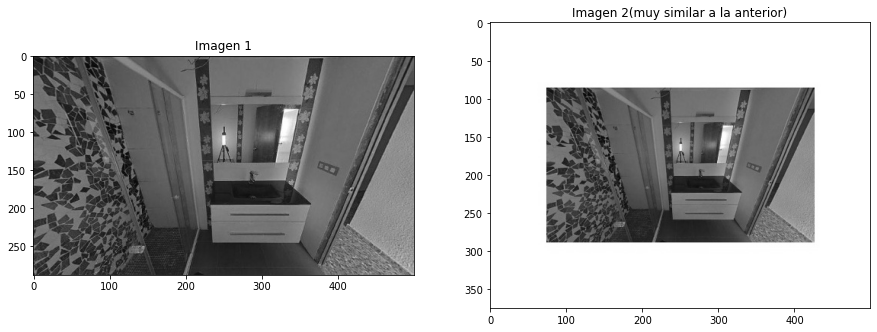

In [133]:
from matplotlib import pyplot as plt

# Mostrar ambas imágenes una al lado de la otra
plt.figure(figsize=(15, 15))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(first_image, cv2.COLOR_GRAY2RGB))
plt.title('Imagen 1')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(second_image, cv2.COLOR_GRAY2RGB))
plt.title('Imagen 2(muy similar a la anterior)')

plt.show()


`Resultado:` No se obtuvieron buenos resultados para comparar imagenes similares. Para comparar duplicados se obtuvieron peores resultados.